In [1]:
import sklearn
from sklearn import datasets 
import pandas as pd
import numpy as np 

In [2]:
# to remove the "%" and remain the same value of the "weight"
food_products = pd.read_csv('jp_lca_dat.csv')
food_products

,Product id,Data S2 Name,Group,id,Product_details,Country,Weight(%),Land Use (m2*year),Arable Land Use (m2*year),Pasture Land Use (m2*year),Biodiversity (sp*yr*10^14),"GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)",Acidification (g SO2eq),Eutrophication (g PO43-eq),Water Use (L),Scarcity Weighted Water Use (L eq),Sys
0,1,Wheat & Rye (Bread),starch_rich,1,Wheat bread,Australia,0.9,7.78,7.78,0.0,220.91,3.67,15.35,13.94,9.22,124.33,C
1,1,Wheat & Rye (Bread),starch_rich,4,Wheat bread,France,1.4,5.42,5.42,0.0,19.49,1.47,-,18.15,9.23,24.81,C
2,1,Wheat & Rye (Bread),starch_rich,5,Wheat and rye bread,France,1.4,29.28,29.28,0.0,105.26,4.46,-,35.38,11.53,84.81,C
3,1,Wheat & Rye (Bread),starch_rich,6,Wheat bread,France,0.2,1.44,1.44,0.0,2.36,1.17,-,2.93,65.36,262.65,C
4,1,Wheat & Rye (Bread),starch_rich,7,Wheat bread,Germany,1.1,1.31,1.31,0.0,2.11,0.65,5.27,0.62,2.19,2.73,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,43,Crustaceans (farmed),protein_rich,2658,Shrimp,Thailand,2.0,1.01,1.01,0.0,16.75,21.85,114.68,196.11,1331.45,50918.21,C
1254,43,Crustaceans (farmed),protein_rich,2659,Shrimp,Thailand,5.5,0.82,0.82,0.0,13.72,19.12,113.49,192.16,1333.85,50474.59,C
1255,43,Crustaceans (farmed),protein_rich,2660,Tiger prawn,Viet Nam,11,0.61,0.61,0.0,10.28,17.26,91.97,120.43,1187.16,51647.14,C
1256,43,Crustaceans (farmed),protein_rich,2661,Shrimp,Viet Nam,1.2,0.45,0.45,0.0,7.54,13.98,82.14,93.20,926.29,40260.05,C


In [3]:
food_groups = food_products["Group"].unique()
food_groups

array(['starch_rich', 'alcohols', 'sugars', 'protein_rich', 'milks',
       'oils', 'vegetables', 'fruit', 'stimulants'], dtype=object)

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

for i, food_group_specific in enumerate(food_groups):
    print()
    print("The Food Group:", food_group_specific)
    
    
    food_group_specific_names = food_products[food_products["Group"] == food_group_specific]


    # Calculate descriptive statistics for each feature in the dataset
    for feature in ['Land Use (m2*year)', 'Biodiversity (sp*yr*10^14)', 'GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)', 'Water Use (L)']:
        feature_data = food_group_specific_names[feature]

        stats_information = np.array([np.mean(feature_data), np.min(feature_data), np.std(feature_data), 
                                      np.median(feature_data), np.max(feature_data)])
        
        # np.percentile(feature_data, 25)
        # np.percentile(feature_data, 75)


        # Print the statistics result
        print("Feature:", feature)
        print("Statistics (mean, min, std, median, max):", stats_information)
        



The Food Group: starch_rich
Feature: Land Use (m2*year)
Statistics (mean, min, std, median, max): [ 2.70269444  0.28        3.02964422  1.725      29.28      ]
Feature: Biodiversity (sp*yr*10^14)
Statistics (mean, min, std, median, max): [ 26.96611111   0.42        51.62498901   7.38       388.73      ]
Feature: GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)
Statistics (mean, min, std, median, max): [ 1.473       0.1         1.57815958  1.045      14.39      ]
Feature: Water Use (L)
Statistics (mean, min, std, median, max): [  688.63116667     0.          1697.29830166    12.78
 12406.61      ]

The Food Group: alcohols
Feature: Land Use (m2*year)
Statistics (mean, min, std, median, max): [1.29718182 0.21       0.96550706 1.285      4.01      ]
Feature: Biodiversity (sp*yr*10^14)
Statistics (mean, min, std, median, max): [ 15.92681818   0.15        30.20368024   5.3        145.33      ]
Feature: GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)
Statistics (mean, min, std, med

In [5]:

# Create a matrix of statistical information
stats_matrix = np.zeros((len(food_groups), 3))

for i, food_specific in enumerate(food_groups):
    for j, feature in enumerate(['Land Use (m2*year)', 'Biodiversity (sp*yr*10^14)', 'Water Use (L)']): 
        # exclude 'GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)' , 
        feature_data = food_group_specific_names[feature]
        
        stats_matrix[i, j] = np.mean(feature_data)

        
# Normalize  
scaler = StandardScaler() 
normalized_stats_matrix = scaler.fit_transform(stats_matrix) 

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(normalized_stats_matrix)

# Print the clustering results
for i, cluster_label in enumerate(cluster_labels):
    print("Food Group", food_groups[i], "belongs to Cluster", cluster_label + 1)
    

Food Group starch_rich belongs to Cluster 1
Food Group alcohols belongs to Cluster 1
Food Group sugars belongs to Cluster 1
Food Group protein_rich belongs to Cluster 1
Food Group milks belongs to Cluster 1
Food Group oils belongs to Cluster 1
Food Group vegetables belongs to Cluster 1
Food Group fruit belongs to Cluster 1
Food Group stimulants belongs to Cluster 1


/Users/cathie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


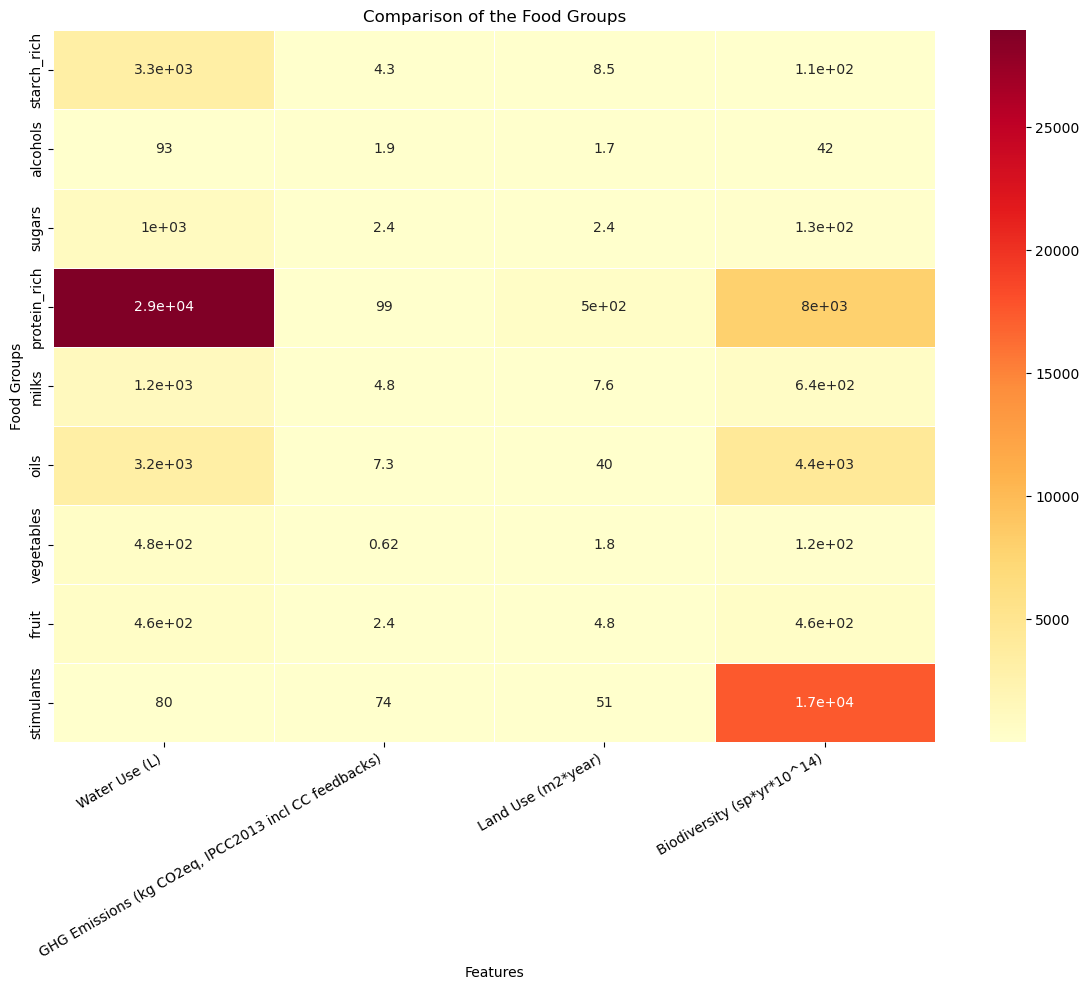

In [20]:
import seaborn as sns

# statistics for food groups, remove the std value
data = {
    "starch_rich": { "Land Use (m2*year)": [2.70269444, 0.28, 1.725, 29.28],
        "Biodiversity (sp*yr*10^14)": [26.96611111, 0.42, 7.38, 388.73],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.473, 0.1, 1.045, 14.39],
        "Water Use (L)": [688.63116667, 0.00, 12.78, 12406.61]
    },
    
    "alcohols": { "Land Use (m2*year)": [1.29718182, 0.21, 1.285, 4.01],
        "Biodiversity (sp*yr*10^14)": [15.92681818, 0.15, 5.3, 145.33],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.33590909, 0.44, 1.1, 4.7],
        "Water Use (L)": [28.80818182, 1.63, 6.96, 336.19]  
    },    
    
    "sugars": { "Land Use (m2*year)": [1.99611111, 0.79, 1.65, 5.33],
        "Biodiversity (sp*yr*10^14)": [83.95138889, 0.0, 27.055, 425.32],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.93888889, 0.55, 1.9, 5.19],
        "Water Use (L)": [544.48888889, 8.14, 17.745, 3567.12]
    },
    
    "protein_rich": { "Land Use (m2*year)": [36.55033778, 0.08, 11.01, 1971.94],
        "Biodiversity (sp*yr*10^14)": [486.92533845, 1.27, 90.91, 31459.31],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [19.81814189, -8.09, 10.69, 374.22],
        "Water Use (L)": [3673.48212838, 0.0, 1158.97, 110939.56]
    },

    "milks": { "Land Use (m2*year)": [1.88980392, 0.28, 1.21, 27.08],
        "Biodiversity (sp*yr*10^14)": [6.28405882e+01, 1.20000000e+00, 5.58000000e+00, 2.48510000e+03],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [2.12686275, 0.72, 1.9, 14.58],
        "Water Use (L)": [2.87756078e+02, 1.22000000e+00, 1.90410000e+02, 4.23362000e+03]    
    },


    "oils": {"Land Use (m2*year)": [13.03488189, 2.02, 7.91, 135.05],
        "Biodiversity (sp*yr*10^14)": [4.82787559e+02, 3.25000000e+00, 9.42200000e+01, 1.69235500e+04],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [4.46858268, -0.27, 3.67, 21.31],
        "Water Use (L)": [5.72934803e+02, 1.43000000e+00, 2.99000000e+00, 1.21102500e+04] 
    },

    "vegetables": { "Land Use (m2*year)": [1.23, 0.7, 1.5, 3.8],
        "Biodiversity (sp*yr*10^14)": [95.0, 15.0, 80.0, 300.0],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [0.4, 0.3, 0.6, 1.2],
        "Water Use (L)": [322.0, 200.0, 400.0, 1000.0]
    },
    
    "fruit": { "Land Use (m2*year)": [0.99834783, 0.19, 0.53, 17.64],
        "Biodiversity (sp*yr*10^14)": [6.38032174e+01, 9.70000000e-01, 1.40200000e+01, 1.76408000e+03],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [0.72278261, 0.03, 0.47, 8.41],
        "Water Use (L)": [196.648 , 0.00, 112.25, 1540.24]    
    },
    
    "stimulants": { "Land Use (m2*year)": [42.26142857, 8.4, 22.53, 130.2],
        "Biodiversity (sp*yr*10^14)": [7097.81666667, 276.64, 2264.42, 60168.59],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [32.48714286, -3.66, 7.37, 257.95],
        "Water Use (L)": [36.5552381, 7.56, 10.41, 265.8] 
  
    } 
}


# Define a Function to create heatmap
def food_heatmap(data):
    features = set()
    for food_group in data:
        features.update(data[food_group].keys())
    features = list(features)

    matrix = np.zeros((len(data), len(features)))
    row_labels = list(data.keys())
    col_labels = features

    
    for i, food_group in enumerate(data):
        for j, feature in enumerate(features):
            if feature in data[food_group]:
                matrix[i, j] = np.mean(data[food_group][feature])
    

    # the heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap="YlOrRd", xticklabels=col_labels, yticklabels=row_labels, linewidths=0.5)
    
    plt.xticks(rotation=30, ha='right')
    
    ax.set_title("Comparison of the Food Groups")
    ax.set_xlabel("Features")
    ax.set_ylabel("Food Groups")
    plt.tight_layout()
    plt.show()

    
# plot the data
food_heatmap(data)

In [21]:

data2 = {
    "starch_rich": { "Land Use (m2*year)": [2.70269444, 0.28, 1.725, 29.28],
        "Biodiversity (sp*yr*10^14)": [26.96611111, 0.42, 7.38, 388.73],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.473, 0.1, 1.045, 14.39],
        "Water Use (L)": [688.63116667, 0.00, 12.78, 12406.61]
    },
    
    "alcohols": { "Land Use (m2*year)": [1.29718182, 0.21, 1.285, 4.01],
        "Biodiversity (sp*yr*10^14)": [15.92681818, 0.15, 5.3, 145.33],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.33590909, 0.44, 1.1, 4.7],
        "Water Use (L)": [28.80818182, 1.63, 6.96, 336.19]  
    },    
    
    "sugars": { "Land Use (m2*year)": [1.99611111, 0.79, 1.65, 5.33],
        "Biodiversity (sp*yr*10^14)": [83.95138889, 0.0, 27.055, 425.32],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.93888889, 0.55, 1.9, 5.19],
        "Water Use (L)": [544.48888889, 8.14, 17.745, 3567.12]
    },
    
    # remove the protein rich

    "milks": { "Land Use (m2*year)": [1.88980392, 0.28, 1.21, 27.08],
        "Biodiversity (sp*yr*10^14)": [6.28405882e+01, 1.20000000e+00, 5.58000000e+00, 2.48510000e+03],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [2.12686275, 0.72, 1.9, 14.58],
        "Water Use (L)": [2.87756078e+02, 1.22000000e+00, 1.90410000e+02, 4.23362000e+03]    
    },


    "oils": {"Land Use (m2*year)": [13.03488189, 2.02, 7.91, 135.05],
        "Biodiversity (sp*yr*10^14)": [4.82787559e+02, 3.25000000e+00, 9.42200000e+01, 1.69235500e+04],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [4.46858268, -0.27, 3.67, 21.31],
        "Water Use (L)": [5.72934803e+02, 1.43000000e+00, 2.99000000e+00, 1.21102500e+04] 
    },

    "vegetables": { "Land Use (m2*year)": [1.23, 0.7, 1.5, 3.8],
        "Biodiversity (sp*yr*10^14)": [95.0, 15.0, 80.0, 300.0],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [0.4, 0.3, 0.6, 1.2],
        "Water Use (L)": [322.0, 200.0, 400.0, 1000.0]
    },
    
    "fruit": { "Land Use (m2*year)": [0.99834783, 0.19, 0.53, 17.64],
        "Biodiversity (sp*yr*10^14)": [6.38032174e+01, 9.70000000e-01, 1.40200000e+01, 1.76408000e+03],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [0.72278261, 0.03, 0.47, 8.41],
        "Water Use (L)": [196.648 , 0.00, 112.25, 1540.24]    
    }
    
    # remove the stimulants
    
}

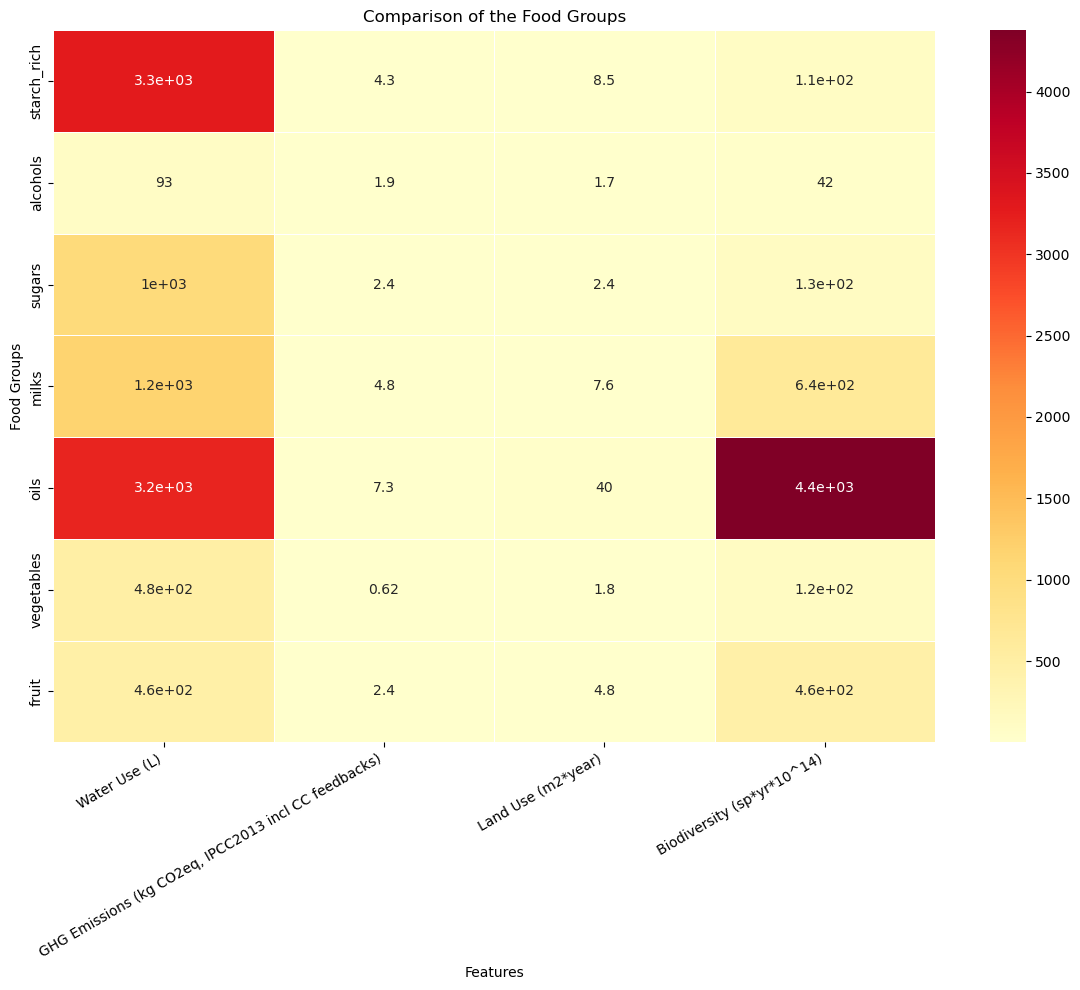

In [22]:
food_heatmap(data2)

In [23]:
data3 = {
    # remove the starch rich
    
    
    "alcohols": { "Land Use (m2*year)": [1.29718182, 0.21, 1.285, 4.01],
        "Biodiversity (sp*yr*10^14)": [15.92681818, 0.15, 5.3, 145.33],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.33590909, 0.44, 1.1, 4.7],
        "Water Use (L)": [28.80818182, 1.63, 6.96, 336.19]  
    },    
    
    "sugars": { "Land Use (m2*year)": [1.99611111, 0.79, 1.65, 5.33],
        "Biodiversity (sp*yr*10^14)": [83.95138889, 0.0, 27.055, 425.32],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [1.93888889, 0.55, 1.9, 5.19],
        "Water Use (L)": [544.48888889, 8.14, 17.745, 3567.12]
    },
    
    # remove the protein rich

    "milks": { "Land Use (m2*year)": [1.88980392, 0.28, 1.21, 27.08],
        "Biodiversity (sp*yr*10^14)": [6.28405882e+01, 1.20000000e+00, 5.58000000e+00, 2.48510000e+03],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [2.12686275, 0.72, 1.9, 14.58],
        "Water Use (L)": [2.87756078e+02, 1.22000000e+00, 1.90410000e+02, 4.23362000e+03]    
    },


    # remove the oils
    

    "vegetables": { "Land Use (m2*year)": [1.23, 0.7, 1.5, 3.8],
        "Biodiversity (sp*yr*10^14)": [95.0, 15.0, 80.0, 300.0],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [0.4, 0.3, 0.6, 1.2],
        "Water Use (L)": [322.0, 200.0, 400.0, 1000.0]
    },
    
    "fruit": { "Land Use (m2*year)": [0.99834783, 0.19, 0.53, 17.64],
        "Biodiversity (sp*yr*10^14)": [6.38032174e+01, 9.70000000e-01, 1.40200000e+01, 1.76408000e+03],
        "GHG Emissions (kg CO2eq, IPCC2013 incl CC feedbacks)": [0.72278261, 0.03, 0.47, 8.41],
        "Water Use (L)": [196.648 , 0.00, 112.25, 1540.24]    
    }
    
    # remove the stimulants
    
} 

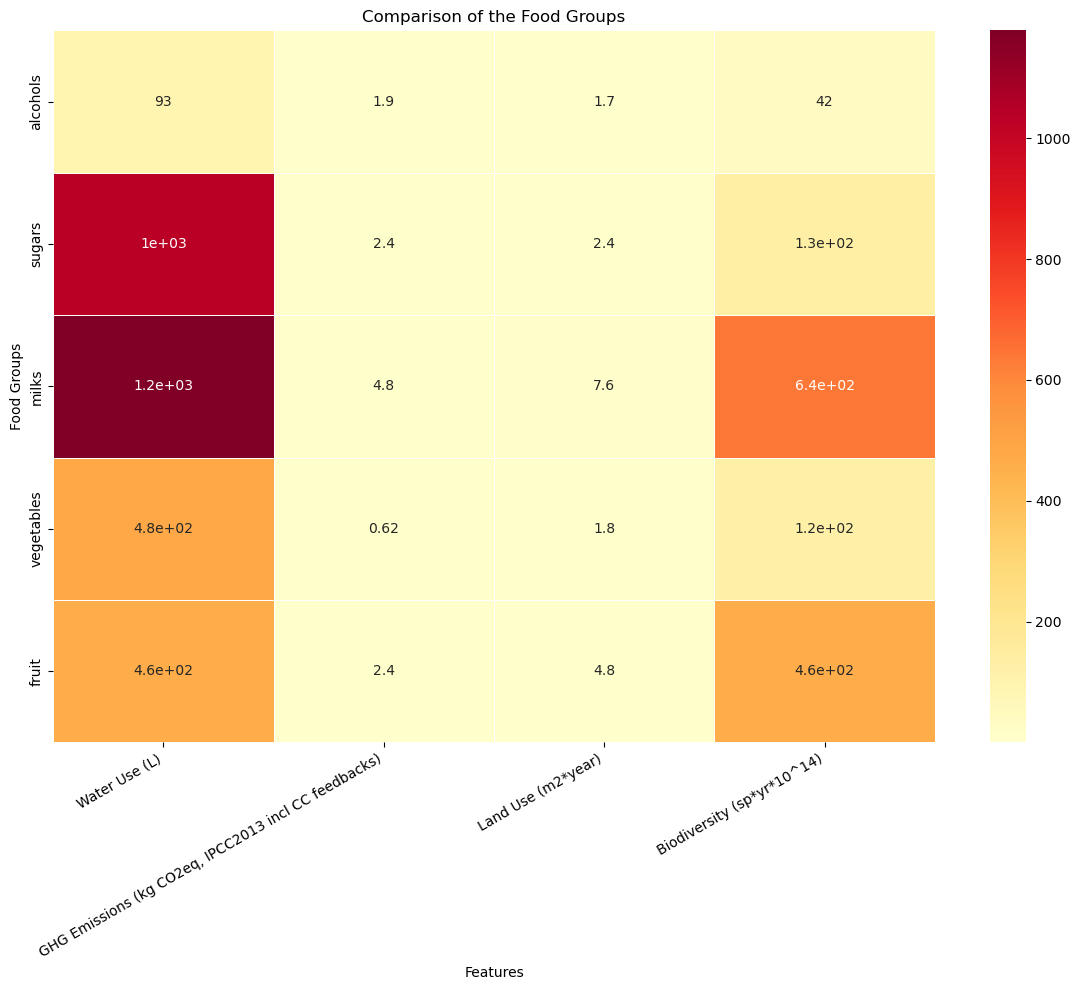

In [24]:
food_heatmap(data3)

In [25]:
# From the above--

# it may be better to use the food from the fruit, vegetables, sugars, and alcohols, these 4 categories...
# but how about milks and starch_rich food...?


# to delve deeper into  "fruit, vegetables, sugars, alcohols, starch_rich...,  plus milks" (see document "03")?

In [28]:
# Furthermore,change the color of the heatmap:

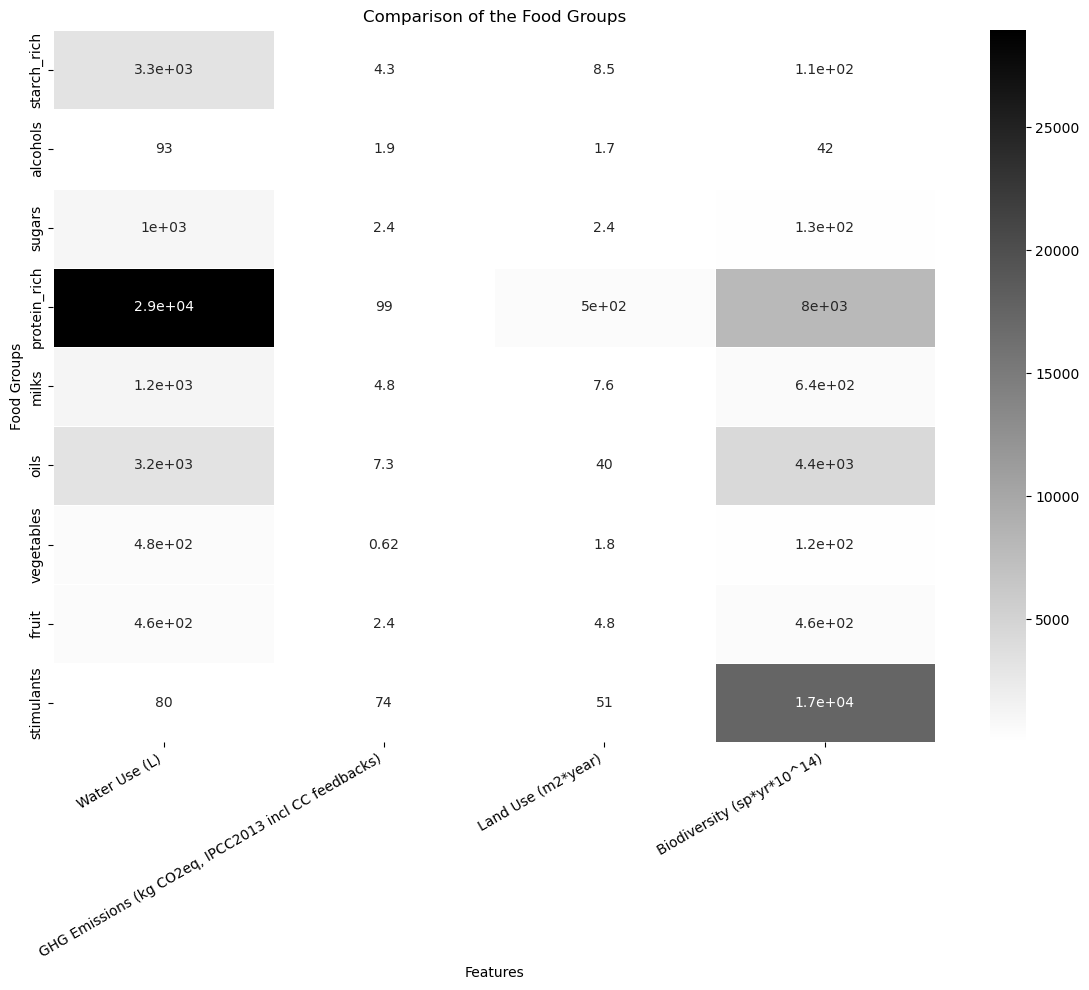

In [29]:
# Define a Function to create heatmap (changed color)
def food_heatmap_gr(data):
    
    features = set()
    for food_group in data:
        features.update(data[food_group].keys())
    features = list(features)

    matrix = np.zeros((len(data), len(features)))
    row_labels = list(data.keys())
    col_labels = features

    
    for i, food_group in enumerate(data):
        for j, feature in enumerate(features):
            if feature in data[food_group]:
                matrix[i, j] = np.mean(data[food_group][feature])
    

    # Create the heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap="gist_yarg", xticklabels=col_labels, yticklabels=row_labels, linewidths=0.5)
    
    # Rotate x-axis labels by 30 degrees
    plt.xticks(rotation=30, ha='right')
    
    ax.set_title("Comparison of the Food Groups")
    ax.set_xlabel("Features")
    ax.set_ylabel("Food Groups")
    plt.tight_layout()
    plt.show()

    
# plot the data
food_heatmap_gr(data)

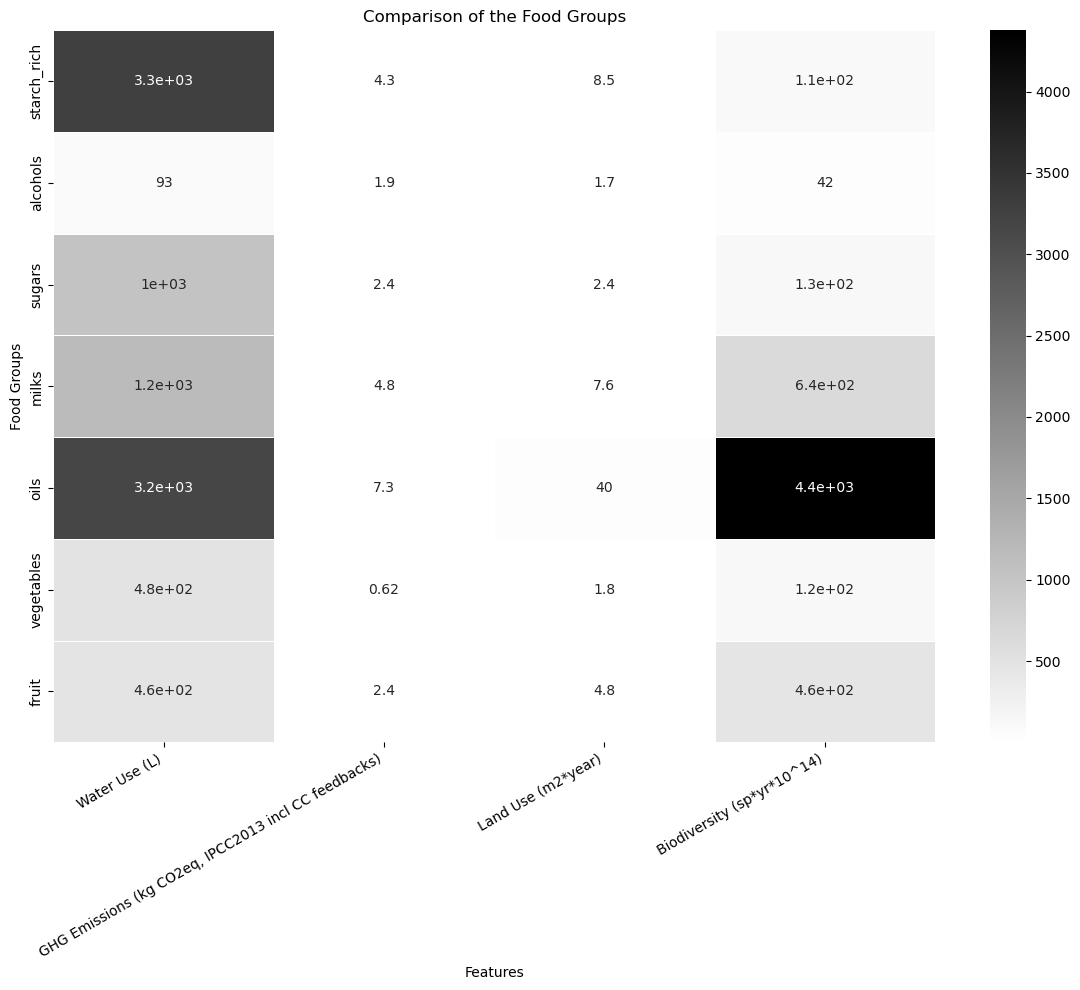

In [14]:

    
food_heatmap_gr(data2)

In [15]:
# To sum up,
# the food resources actually are quite similar with each other regarding the impacts to the environment, 
# so the main focus of the improvements on the sustainability aspect probably will be put more efforts on 
# the issues relate to the development of innovative technologies, and the improvement of the 
# effective supply chain solutions,and further with the business and marketing strategies.

In [16]:
# - End -